## Review steps

1. Data collection
2. Data preprocessing
3. train-test split
4. Choosing ml/dl model
5. Train model
6. Do prediction and evaluate the model

In [1]:
import numpy as np # linear algebra import pandas
from numpy import array
import pandas as pd
import math 
import seaborn as sns 
import datetime as dt 
from datetime import datetime
sns.set_style("whitegrid") 
from pandas.plotting import autocorrelation_plot 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot" )
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm
from sklearn.svm import SVR

## Loading data

In [2]:
data= pd.read_csv("Suzuki-2.csv",delimiter=";")
data

,Date,Price,Open,High,Low,Volume,Change
0,04/01/2018,"6742,00","6600,00","6744,00","6588,00","1940000,0","0,0318"
1,05/01/2018,"6740,00","6742,00","6775,00","6681,00","2010000,0","-0,0003"
2,09/01/2018,"6653,00","6800,00","6811,00","6648,00","2100000,0","-0,0129"
3,10/01/2018,"6666,00","6650,00","6699,00","6636,00","1070000,0","0,002"
4,11/01/2018,"6564,00","6634,00","6644,00","6528,00","1660000,0","-0,0153"
...,...,...,...,...,...,...,...
1447,08/12/2023,"5744,00","5732,00","5769,00","5679,00","2320000,0","-0,025"
1448,11/12/2023,"5742,00","5724,00","5782,00","5708,00","1490000,0","-0,0003"
1449,12/12/2023,"5639,00","5800,00","5818,00","5638,00","1760000,0","-0,0179"
1450,13/12/2023,"5682,00","5600,00","5696,00","5545,00","1940000,0","0,0076"


## Data Exploration

In [3]:
# Check the data type of each value column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1452 non-null   object
 1   Price   1452 non-null   object
 2   Open    1452 non-null   object
 3   High    1452 non-null   object
 4   Low     1452 non-null   object
 5   Volume  1452 non-null   object
 6   Change  1452 non-null   object
dtypes: object(7)
memory usage: 79.5+ KB


In [4]:
# Reformat the date data type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')  # Ví dụ cho định dạng dd/mm/yyyy
data['Date']

0      2018-01-04
1      2018-01-05
2      2018-01-09
3      2018-01-10
4      2018-01-11
          ...    
1447   2023-12-08
1448   2023-12-11
1449   2023-12-12
1450   2023-12-13
1451   2023-12-14
Name: Date, Length: 1452, dtype: datetime64[ns]

In [5]:
# Clean data and cast data for calculation
data['Price'] = data['Price'].str.replace(',', '.').astype(float)
data['Open'] = data['Open'].str.replace(',', '.').astype(float)
data['High'] = data['High'].str.replace(',', '.').astype(float)
data['Low'] = data['Low'].str.replace(',', '.').astype(float)
data['Volume'] = data['Volume'].str.replace(',', '.').astype(float)
data['Change'] = data['Change'].str.replace(',', '.').astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1452 non-null   datetime64[ns]
 1   Price   1452 non-null   float64       
 2   Open    1452 non-null   float64       
 3   High    1452 non-null   float64       
 4   Low     1452 non-null   float64       
 5   Volume  1452 non-null   float64       
 6   Change  1452 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 79.5 KB


In [6]:
# Gets descriptive statistical information about a DataFrame or a Series
data.describe()

,Date,Price,Open,High,Low,Volume,Change
count,1452,1452.000000,1452.000000,1452.000000,1452.000000,1.452000e+03,1452.000000
mean,2020-12-26 16:00:59.504132352,4968.014807,4971.077135,5025.840220,4914.231061,1.824907e+06,0.000106
min,2018-01-04 00:00:00,2465.500000,2469.500000,2551.500000,2438.000000,4.430000e+05,-0.139700
25%,2019-07-01 18:00:00,4493.250000,4500.000000,4566.000000,4451.750000,1.260000e+06,-0.011725
50%,2020-12-28 12:00:00,4867.500000,4870.500000,4921.500000,4818.500000,1.630000e+06,0.000000
75%,2022-06-24 18:00:00,5424.250000,5423.500000,5504.250000,5367.000000,2.140000e+06,0.011700
max,2023-12-14 00:00:00,7639.000000,7613.000000,7680.000000,7494.000000,9.980000e+06,0.111500
std,NaN,833.802239,836.965130,837.524591,833.583430,8.684992e+05,0.021457


## Data Visualization

In [7]:
# Reshape turns df into a NumPy array of size (-1, 1)
df=data['Price'].values
df = df.reshape(-1, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Perform data normalization according to the min-max scaling method
price_scaled=scaler.fit_transform(df) # Fit và transform the data
price_scaled

array([[0.82661641],
       [0.82622983],
       [0.80941336],
       ...,
       [0.61341452],
       [0.6217261 ],
       [0.57900841]])

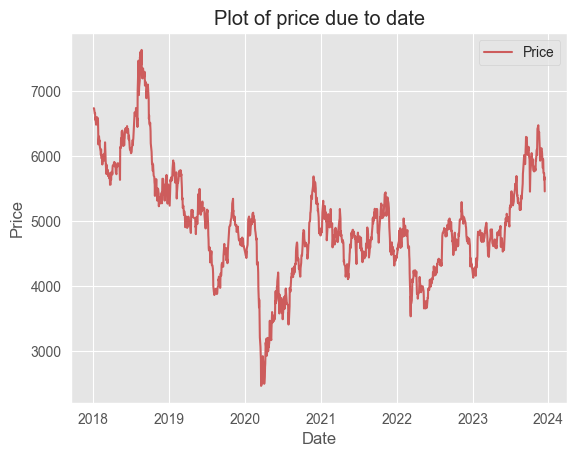

In [9]:
# Create plot
plt.figure(figure=(10,6))
plt.plot(data['Date'],data['Price'].values, label="Price", color="IndianRed")

# Adding title
plt.title("Plot of price due to date")

# Adding label
plt.xlabel("Date")
plt.ylabel("Price")

# Show the plot
plt.legend()
plt.show()

## Data Preprocessing

### Split data into training and testing set

### Training - testing 6:4

In [10]:
# Split train test validation in ratio 6:4
# Split the data into training, testing
train_size = int(0.6 * len(data))
test_size = int(0.4 * len(data))

X2D = data[['High']] # Independent variable in 2-dimensional array
Y2D = data[['Price']] # Dependent variable in 2-dimensional array

In [11]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # Get the index before converting it to a 2-dimensional array (serves plot)
y_train = Y2D[:train_size].values.ravel()

# Create SVR model with RBF kernel
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  
    'epsilon': [0.001, 0.01, 0.1, 1, 10]     
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model using grid search
svr_rbf = grid_search.fit(x_train,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'C': 1000, 'epsilon': 1, 'gamma': 'scale'}
Best score: 203577.0552107712


In [12]:
y_pred = svr_rbf.predict(x_test)
y_pred

array([4475.49861585, 4461.35667115, 4689.74820575, 4611.99728179,
       4817.97395378, 4901.44305127, 4875.60230751, 4784.19509686,
       4792.14332273, 4717.60332218, 4749.41601697, 4606.00383775,
       4561.98097856, 4583.00823272, 4644.9257306 , 4619.98529188,
       4625.97395863, 4698.7040144 , 4724.56402403, 4781.21442977,
       4767.30383561, 4783.2015468 , 4882.55887534, 5039.67729924,
       5029.72995036, 5011.82458871, 5035.69838074, 5031.71943249,
       5170.89141204, 5106.30966666, 5161.95484291, 5174.86254645,
       5093.38434798, 5058.57643621, 5139.10815839, 5206.61531486,
       5197.68791983, 5155.99601147, 5126.18985185, 4904.42505093,
       4867.65240905, 4747.42823254, 4731.52370322, 4683.77625189,
       4896.47322886, 4939.22097974, 4999.88793281, 5053.60313037,
       5054.59780187, 5116.25057673, 5271.00992196, 5270.02038685,
       5283.87045812, 5240.31718987, 5096.36730934, 5059.57108101,
       5147.05617964, 5103.32710288, 5124.20213661, 5086.42369

In [13]:
last_row = data.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[5461.]])

In [14]:
x_next_30_days = []
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with f

[array([5414.10878863]),
 array([5367.91035823]),
 array([5322.32518534]),
 array([5277.26804596]),
 array([5232.65648415]),
 array([5188.41717987]),
 array([5144.49029087]),
 array([5100.83188399]),
 array([5057.41456851]),
 array([5014.22644838]),
 array([4971.26854865]),
 array([4928.55094744]),
 array([4886.08794267]),
 array([4843.89267241]),
 array([4801.97165884]),
 array([4760.31973434]),
 array([4718.91573042]),
 array([4677.71918216]),
 array([4636.66815286]),
 array([4595.67815334]),
 array([4554.64204548]),
 array([4513.43079995]),
 array([4471.89502593]),
 array([4429.86730323]),
 array([4387.16551316]),
 array([4343.59757227]),
 array([4298.96820167]),
 array([4253.08857317]),
 array([4205.7897807]),
 array([4156.94093796])]

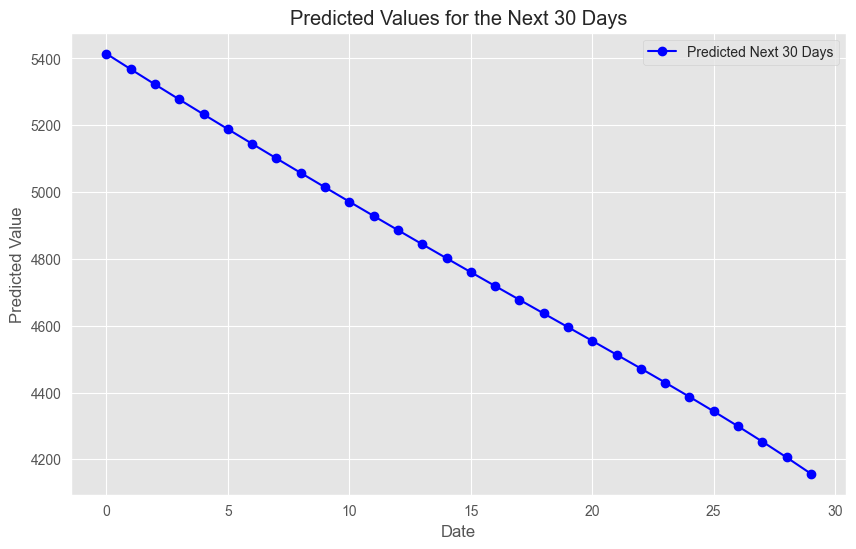

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.legend()

plt.show()

In [16]:
y_pred = y_pred.reshape(-1,1)

In [ ]:
# Create index for the next 30 days
last_index =  data.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

In [17]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', str(test_mape*100)+'%')
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)
# Huber loss
hl= mean_squared_error(y_test, y_pred, multioutput='raw_values')
print('Huber loss:', hl)

Testing RMSE: 45.31792910413668
Testing MAPE: 0.6740354277447269%
Testing MAE: 32.46829068730847
Huber loss: [2053.71469829]


In [ ]:
plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()